Homework for module 2

In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



In [74]:
df = pd.read_csv("laptops.csv")
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [75]:
df.head(5).T

,0,1,2,3,4
Laptop,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...
Status,New,New,New,New,New
Brand,Asus,Alurin,Asus,MSI,HP
Model,ExpertBook,Go,ExpertBook,Katana,15S
CPU,Intel Core i5,Intel Celeron,Intel Core i3,Intel Core i7,Intel Core i5
RAM,8,8,8,16,16
Storage,512,256,256,1000,512
Storage type,SSD,SSD,SSD,SSD,SSD
GPU,NaN,NaN,NaN,RTX 3050,NaN
Screen,15.6,15.6,15.6,15.6,15.6


Preparing the dataset

In [76]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [77]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


EDA

C:\Users\mderkaoui\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


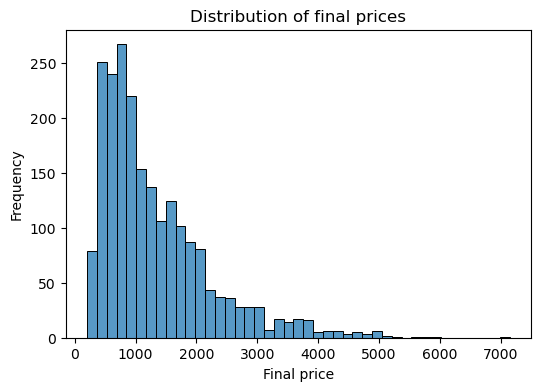

In [78]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price) #, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Final price')
plt.title('Distribution of final prices')

plt.show()

As we see, final_price has a long tail for values > 4000 for final price.

C:\Users\mderkaoui\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


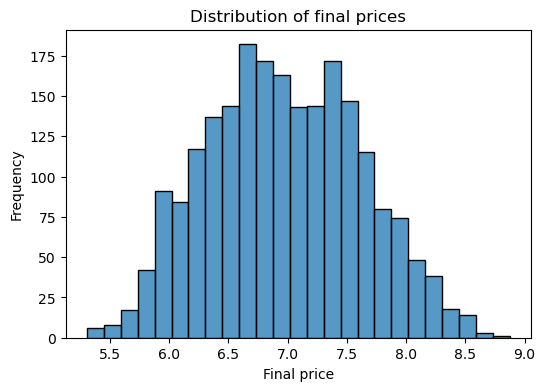

In [79]:
# Apply np.log1p to final price
df['final_price'] = np.log1p(df['final_price'])

plt.figure(figsize=(6, 4))

sns.histplot(df.final_price) #, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Final price')
plt.title('Distribution of final prices')

plt.show()

Question 1 : 

The one column with missing values is : screen

In [80]:
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

Question 2 :

What's the median (50% percentile) for variable 'ram'? it's 16 ! 

In [81]:
df.ram.head(20)
df.ram.median()



16.0

Prepare and split the dataset


In [82]:
np.random.seed(42)

In [83]:
n = len(df)
id_all = np.arange(n)
np.random.shuffle(id_all)

In [84]:
df_shuffled = df.iloc[id_all].copy()
df_shuffled.reset_index(drop = True, inplace = True)
df_shuffled.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,7.024907
1,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,5.308515
2,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,6.906494
3,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,6.924612
4,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,7.915713


In [85]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

In [86]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:n_train + n_val + n_test].copy()

In [87]:
len(df_train), len(df_val), len(df_test), n, len(df_train) + len(df_val) + len(df_test)

(1296, 432, 432, 2160, 2160)

# Question 3 :

## Linear Regression

In [88]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [89]:
# At this level, we have to do linear regression only on the numerical variable
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [90]:
base = list(df.dtypes[df.dtypes != 'object'].index)
base #this is the numerical columns to apply linear regression on 

['ram', 'storage', 'screen', 'final_price']

In [91]:
df_train_filled = df_train[base].copy() 

In [92]:
def prepare_X(df, value_fill):
    df["screen"] = df["screen"].fillna(value_fill)
    #print(df["screen"].mean())
    y = df["final_price"].copy()
    del df["final_price"]
    return df, y

In [93]:

#option fill with 0
df_train_filled, y_train = prepare_X(df_train_filled, 0)
w0, w = train_linear_regression(df_train_filled, y_train)
print(w0, w)


6.727163706116559 [ 0.02630589  0.00066041 -0.03651909]


In [94]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse),3)

In [95]:
#applying the model on the train dataset and calculating the rmse
y_train_pred = w0 + df_train_filled.dot(w)
print(y_train_pred)
rmse(y_train, y_train_pred) 

0       7.659661
1       6.359734
2       7.718091
3       7.000482
4       7.645053
          ...   
1291    6.595408
1292    7.645053
1293    6.916488
1294    6.974919
1295    6.974919
Length: 1296, dtype: float64


0.446

In [96]:
#applying the model with fillna 0 on the validation dataset and calculating the rmse
df_val_filled = df_val[base].copy()

df_val_filled, y = prepare_X(df_val_filled, 0)
w0, w = train_linear_regression(df_val_filled, y)
print(w0, w)

y_pred = w0 + df_val_filled.dot(w)
print(y_pred)
rmse(y, y_pred)

6.598621880739509 [ 0.03108628  0.0008661  -0.04076371]
1296    7.807267
1297    6.903534
1298    6.779189
1299    6.514648
1300    6.654843
          ...   
1723    6.428245
1724    6.526877
1725    6.720065
1726    6.968756
1727    6.207706
Length: 432, dtype: float64


0.417

In [97]:
df_train_filled = df_train[base].copy() 

In [98]:

#option fill with mean
print(df_train_filled["screen"].mean())
df_train_filled, y_train = prepare_X(df_train_filled, df_train_filled["screen"].mean())
w0, w = train_linear_regression(df_train_filled, y_train)
print(w0, w)

15.163534416086618
6.855566544140346 [ 0.02650252  0.00066643 -0.04534341]


In [99]:
#applying the model on the train dataset and calculating the rmse
y_train_pred = w0 + df_train_filled.dot(w)
print(y_train_pred)
rmse(y_train, y_train_pred)

0       7.662716
1       6.364886
2       7.735265
3       7.017750
4       7.644579
          ...   
1291    6.603384
1292    7.644579
1293    6.913460
1294    6.986009
1295    6.986009
Length: 1296, dtype: float64


0.446

In [100]:
#applying the model with fillna mean() on the validation dataset and calculating the rmse
df_val_filled = df_val[base].copy()

df_val_filled, y = prepare_X(df_val_filled, df_val_filled["screen"].mean())
w0, w = train_linear_regression(df_val_filled, y)
print(w0, w)

y_pred = w0 + df_val_filled.dot(w)
print(y_pred)
rmse(y, y_pred)

6.454935522623448 [ 0.03108859  0.00085024 -0.03058276]
1296    7.810690
1297    6.910587
1298    6.786232
1299    6.505381
1300    6.661878
          ...   
1723    6.414900
1724    6.514556
1725    6.710810
1726    6.959519
1727    6.205547
Length: 432, dtype: float64


0.419

## Answer for question 3 :
RMSE for Model with fillna(0) applied to val dataset is 589.28 and for Model with fillna with mean() applied to val dataset is 590.65. The first one is slightly better.

## Question 4 

In [101]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [102]:
df_train_filled = df_train[base].copy()
df_train_filled, y_train = prepare_X(df_train_filled, 0)

df_val_filled = df_val[base].copy()
df_val_filled, y_val = prepare_X(df_val_filled, 0)

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_values :
    w0, w = train_linear_regression_reg(df_train_filled, y_train, r)
    y_pred = w0 + df_val_filled.dot(w)
    print(f'for regularization value {r}, the RMSE is {rmse(y_val, y_pred)}')


for regularization value 0, the RMSE is 0.429
for regularization value 0.01, the RMSE is 0.429
for regularization value 0.1, the RMSE is 0.429
for regularization value 1, the RMSE is 0.431
for regularization value 5, the RMSE is 0.463
for regularization value 10, the RMSE is 0.508
for regularization value 100, the RMSE is 0.674


### answer 4: r = 5 gives the best RMSE, but among the options proposed in the answers , r = 1

## Question 5

In [103]:
base = ['ram', 'storage', 'screen', 'final_price']
seed_list = []
rmse_list = []
for n in np.arange(10): 
    np.random.seed(n)

    #do the split
    p = len(df)
    id_all = np.arange(p)
    np.random.shuffle(id_all)

    df_shuffled = df.iloc[id_all].copy()
    df_shuffled.reset_index(drop = True, inplace = True)
    #df_shuffled.head()

    n_val = int(0.2 * p)
    n_test = int(0.2 * p)
    n_train = p - n_val - n_test
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:n_train + n_val + n_test].copy()

    df_train_filled = df_train[base].copy() 
    df_train_filled, y_train = prepare_X(df_train_filled, 0)
    
    w0, w = train_linear_regression(df_train_filled, y_train)

    df_val_filled = df_val[base].copy()
    df_val_filled, y_val = prepare_X(df_val_filled, 0)

    y_pred = w0 + df_val_filled.dot(w)
    rmse_n = rmse(y_val, y_pred)
    seed_list.append(n)
    rmse_list.append(rmse_n)
    print(f'For seed {n}, rmse is {rmse_n}')
    

For seed 0, rmse is 0.43
For seed 1, rmse is 0.452
For seed 2, rmse is 0.446
For seed 3, rmse is 0.446
For seed 4, rmse is 0.42
For seed 5, rmse is 0.425
For seed 6, rmse is 0.449
For seed 7, rmse is 0.431
For seed 8, rmse is 0.443
For seed 9, rmse is 0.408


In [104]:
max(rmse_list)

0.452

In [105]:
round(np.std(rmse_list),3)

0.014

### answer 5 : the value of std is 29.176

## Question 6

In [106]:
n = 9
np.random.seed(n)

#do the split
p = len(df)
id_all = np.arange(p)
np.random.shuffle(id_all)
df_shuffled = df.iloc[id_all].copy()
df_shuffled.reset_index(drop = True, inplace = True)

n_test = int(0.2 * p)
n_train = p - n_test

df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train:].copy()

df_train = df_train[base].copy()
df_train_filled, y_train = prepare_X(df_train, 0)

w0, w = train_linear_regression_reg(df_train_filled, y_train, 0.001)

df_test = df_test[base].copy()
df_test_filled, y_test = prepare_X(df_test, 0)

y_pred = w0 + df_test_filled.dot(w)
rmse = rmse(y_test, y_pred)
print(f'For seed {n}, rmse is {rmse}')

For seed 9, rmse is 0.455


### answer 6 : the RMSE on the test dataset is 608.61